In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')

# EDA exploratory data analysis

In [3]:
# find categorical  var
categorical = [var for var in df.columns if df[var].dtype == 'O']


In [4]:
# view the categorical variables
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No


In [5]:
# check missing value
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9331
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

# Feature Engineering of DAta variable

In [6]:
df['Date'].dtype

dtype('O')

In [7]:
# parse the dates, currently coded as string
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#extract 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['date'] = df['Date'].dt.day

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,date
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# explore location varible

In [10]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [11]:
df.Location.nunique()

49

In [12]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3012
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


# Explore WindGustDir varible

In [13]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [15]:
# WindDir9am
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [16]:
df.WindDir9am.value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8494
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [17]:
# # WindDir3pm
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [18]:
df.WindDir3pm.value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8657
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [19]:
# RainToday
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df.RainToday.value_counts()

No     109333
Yes     31455
Name: RainToday, dtype: int64

# Explore numeric variable

In [21]:
df.drop('Date', axis = 1, inplace = True)

In [22]:
numerical = [var for var in df.columns if df[var].dtype != "O"]

In [23]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,date
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


# Outliers

In [24]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141557.0  141872.0  140788.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140846.0      139564.0     140420.0     138584.0     128180.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0,0.5,'WindSpeed3pm')

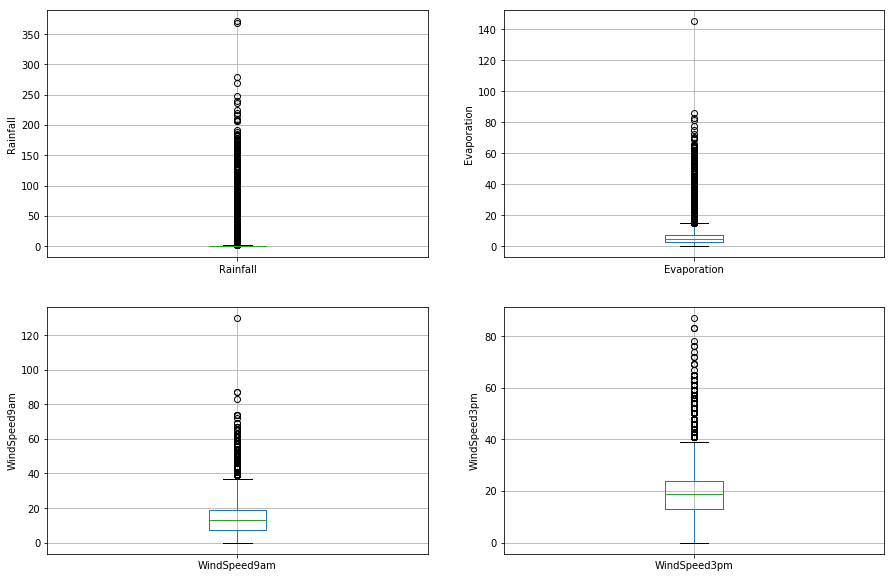

In [25]:
# draw bocplot
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column = 'Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig = df.boxplot(column = 'Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column = 'WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.boxplot(column = 'WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0.5,0,'WindSpeed3pm')

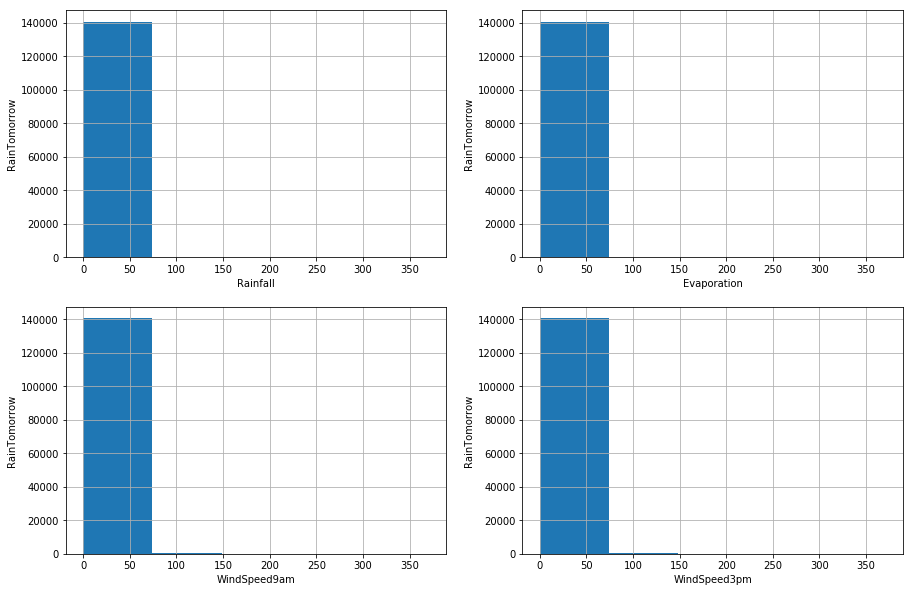

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins = 5)
fig.set_ylabel('RainTomorrow')
fig.set_xlabel('Rainfall')

plt.subplot(2,2,2)
fig = df.Rainfall.hist(bins = 5)
fig.set_ylabel('RainTomorrow')
fig.set_xlabel('Evaporation')

plt.subplot(2,2,3)
fig = df.Rainfall.hist(bins = 5)
fig.set_ylabel('RainTomorrow')
fig.set_xlabel('WindSpeed9am')

plt.subplot(2,2,4)
fig = df.Rainfall.hist(bins = 5)
fig.set_ylabel('RainTomorrow')
fig.set_xlabel('WindSpeed3pm')

In [27]:
# finding outliers for rainfall var
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lower_fence = df.Rainfall.quantile(0.25) - (IQR *3)
upper_fence = df.Rainfall.quantile(0.25) + (IQR *3)
print('Rainfall outliers are values < {lowerboundary} or {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Rainfall outliers are values < -2.4000000000000004 or 2.4000000000000004


In [28]:
# finding outliers for Evaporation var
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lower_fence = df.Evaporation.quantile(0.25) - (IQR *3)
upper_fence = df.Evaporation.quantile(0.25) + (IQR *3)
print('Evaporation outliers are values < {lowerboundary} or {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Evaporation outliers are values < -11.800000000000002 or 17.000000000000004


In [29]:
# finding outliers for WindSpeed9am var
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed9am.quantile(0.25) + (IQR *3)
print('WindSpeed9am outliers are values < {lowerboundary} or {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

WindSpeed9am outliers are values < -29.0 or 43.0


In [30]:
# finding outliers for WindSpeed3pm var
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed3pm.quantile(0.25) + (IQR *3)
print('WindSpeed3pm outliers are values < {lowerboundary} or {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

WindSpeed3pm outliers are values < -20.0 or 46.0


# Declare feature vector and target variable

In [31]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

# split data inot separate training and test test

In [32]:
#split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Feature Engineering

In [33]:
# Engineering missing values in the numerical var
for df1 in [x_train, x_test]:
    for col in numerical:
        col_median = x_train[col].median()
        df1[col].fillna(col_median, inplace = True)

In [34]:
for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0],inplace = True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0],inplace = True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0],inplace = True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0],inplace = True)

In [35]:
# checking missing values
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
year             0
month            0
date             0
dtype: int64

# Engineering oUtliers

In [36]:
def max_value (df3, variable, top):
    return np.where(df3[variable] > top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [37]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,date
count,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.00000,113755.000000,113755.000000,113755.000000,113755.000000,113755.00000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000
mean,12.172933,23.230461,0.677570,5.145685,8.042206,39.893148,13.971825,18.61956,68.853466,51.477201,1017.645997,1015.249258,4.64624,4.703758,16.979500,21.681708,2012.758411,6.403253,15.705182
std,6.390645,7.106427,1.185487,2.815228,2.765818,13.132672,8.816184,8.68742,18.943381,20.560090,6.749736,6.680317,2.29404,2.116838,6.472459,6.867876,2.541224,3.427554,8.794094
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,982.000000,978.200000,0.00000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.00000,57.000000,37.000000,1013.500000,1011.000000,3.00000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.00000,70.000000,52.000000,1017.600000,1015.200000,5.00000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.00000,83.000000,65.000000,1021.800000,1019.400000,6.00000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.00000,100.000000,100.000000,1041.000000,1039.600000,9.00000,9.000000,40.200000,46.100000,2017.000000,12.000000,31.000000


In [38]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,date
count,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.00000,113755.000000,113755.000000,113755.000000,113755.000000,113755.00000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000
mean,12.172933,23.230461,0.677570,5.145685,8.042206,39.893148,13.971825,18.61956,68.853466,51.477201,1017.645997,1015.249258,4.64624,4.703758,16.979500,21.681708,2012.758411,6.403253,15.705182
std,6.390645,7.106427,1.185487,2.815228,2.765818,13.132672,8.816184,8.68742,18.943381,20.560090,6.749736,6.680317,2.29404,2.116838,6.472459,6.867876,2.541224,3.427554,8.794094
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,982.000000,978.200000,0.00000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.00000,57.000000,37.000000,1013.500000,1011.000000,3.00000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.00000,70.000000,52.000000,1017.600000,1015.200000,5.00000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.00000,83.000000,65.000000,1021.800000,1019.400000,6.00000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.00000,100.000000,100.000000,1041.000000,1039.600000,9.00000,9.000000,40.200000,46.100000,2017.000000,12.000000,31.000000


In [39]:
#Encode categorical variables

In [40]:
# encode RainToday variable
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [41]:
x_train = pd.concat([x_train[numerical], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location), 
                     pd.get_dummies(x_train.WindGustDir),
                     pd.get_dummies(x_train.WindDir9am),
                     pd.get_dummies(x_train.WindDir3pm)], axis=1)

In [42]:
x_test = pd.concat([x_test[numerical], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

In [43]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86233,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,11.9,15.8,3.2,0.4,8.5,44.0,6.0,24.0,97.0,67.0,...,0,0,0,0,0,0,0,0,0,1
124073,6.7,18.5,0.0,4.8,8.5,20.0,0.0,7.0,88.0,67.0,...,0,0,0,0,1,0,0,0,0,0
117957,17.0,31.8,0.0,11.6,11.5,43.0,20.0,11.0,59.0,25.0,...,0,0,0,0,0,0,0,0,0,0
133469,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


# Feature scaling

In [44]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.00000,113755.000000,113755.000000,...,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000,113755.000000
mean,12.172933,23.230461,0.677570,5.145685,8.042206,39.893148,13.971825,18.61956,68.853466,51.477201,...,0.054591,0.059505,0.067461,0.101763,0.064041,0.056191,0.064859,0.069597,0.060578,0.065966
std,6.390645,7.106427,1.185487,2.815228,2.765818,13.132672,8.816184,8.68742,18.943381,20.560090,...,0.227181,0.236569,0.250819,0.302337,0.244827,0.230291,0.246277,0.254468,0.238555,0.248224
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.00000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.00000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.00000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.00000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
cols = x_train.columns

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)


In [47]:
x_train

array([[0.49643705, 0.48560461, 0.125     , ..., 1.        , 0.        ,
        0.        ],
       [0.48693587, 0.72552783, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42517815, 0.78694818, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46555819, 0.4452975 , 0.4375    , ..., 0.        , 0.        ,
        0.        ],
       [0.62470309, 0.54318618, 0.0625    , ..., 0.        , 0.        ,
        0.        ],
       [0.57007126, 0.59309021, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [49]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [110]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.496437,0.485605,0.125,0.183486,0.393103,0.356589,0.236364,0.684211,0.82,0.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.486936,0.725528,0.000,0.366972,0.510345,0.325581,0.363636,0.350877,0.51,0.20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425178,0.786948,0.000,0.522936,0.848276,0.193798,0.272727,0.192982,0.06,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.681710,0.669866,0.000,0.403670,0.765517,0.240310,0.400000,0.333333,0.59,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.665083,0.633397,0.000,0.220183,0.586207,0.255814,0.000000,0.192982,0.77,0.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_train= y_train.replace(np.nan, '', regex = True )
y_test = y_test.replace(np.nan, '', regex = True)

# Model Training 

In [52]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the Model
logreg = LogisticRegression(solver='liblinear', random_state = 0)
# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [53]:
y_test.head()

86233     No
57576     No
124073    No
117957    No
133469    No
Name: RainTomorrow, dtype: object

In [54]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.608076,0.648752,0.0,0.165138,0.765517,0.209302,0.200000,0.333333,0.63,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.477435,0.395393,1.0,0.018349,0.586207,0.294574,0.109091,0.421053,0.97,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.353919,0.447217,0.0,0.220183,0.586207,0.108527,0.000000,0.122807,0.88,0.67,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.598575,0.702495,0.0,0.532110,0.793103,0.286822,0.363636,0.192982,0.59,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.356295,0.366603,1.0,0.009174,0.503448,0.170543,0.272727,0.228070,0.92,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y_pred_test = logreg.predict(x_test)
y_pred_test

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [56]:
# probability of getting output as 0 - no rain
logreg.predict_proba(x_test)[:,0]

array([0.91123233, 0.33476479, 0.85894656, ..., 0.97666339, 0.80493763,
       0.39356419])

In [57]:
logreg.predict_proba(x_test)[:,1]

array([0.08876767, 0.66523521, 0.14105344, ..., 0.02333661, 0.19506237,
       0.60643581])

In [91]:
# probability of getting output as 1 - rain

y_pred1=logreg.predict_proba(x_test)[:,1]

In [58]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [59]:
from sklearn.metrics import accuracy_score
print("Training -set accuracy score : {0:0.4f}".format(accuracy_score(y_train, y_pred_train)))

Training -set accuracy score : 0.8476


In [60]:
x_test.shape

(28439, 118)

In [61]:
y_test.shape

(28439,)

In [62]:
x_train.shape

(113755, 118)

In [63]:
y_train.shape

(113755,)

# Check for overfitting and underfitting

In [64]:
print('Training set score : {:.4f}'. format (logreg.score(x_train, y_train)))
print('Test set score : {:.4f}'. format (logreg.score(x_test, y_test)))

Training set score : 0.8476
Test set score : 0.8493


# Confusion matrix


In [71]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20891  1205]
 [ 3081  3262]]

True Positives(TP) =  20891

True Negatives(TN) =  3262

False Positives(FP) =  1205

False Negatives(FN) =  3081


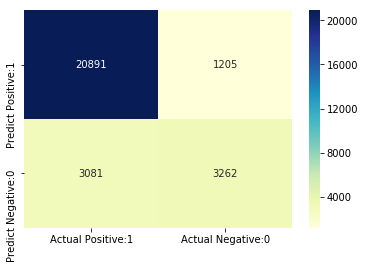

In [72]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22096
         Yes       0.73      0.51      0.60      6343

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



# Classification Accuracy


In [75]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [69]:
# print(classification accuracy)

In [76]:
classification_accuracy = (TP + TN)/ float (TP + TN + FN + FP)
print('Classification accuracy : {0:0.4f}'. format(classification_accuracy))

Classification accuracy : 0.8493


In [77]:
# Classification Error

In [79]:
classification_error = (FP+FN) / float( TP + TN + FN + FP)
print('Classification error : {0:0.4f}'. format(classification_error))

Classification error : 0.1507


# precision

In [81]:
# print precision score 
precision = TP/ float (TP + FP)
print('Precison : {0:0.4f}'. format(precision))

Precison : 0.9455


# Recall


In [82]:
recall = TP / float(TP + FN)
print('Recall or sensitivity : {0:0.4f}'. format(recall))

Recall or sensitivity : 0.8715


# true positive Rate

In [83]:
true_positive_rate = TP/float(TP + FN)
print('True_positive_rate: {0:0.4f}'. format (true_positive_rate))

True_positive_rate: 0.8715


In [84]:
#Specifity

In [85]:
specifity = TN / (TN +FP)
print('Specificity : {0:0.4f}'. format(specifity))

Specificity : 0.7302


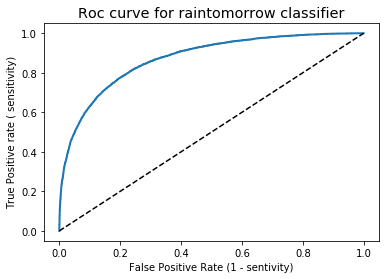

In [92]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size']=12
plt.title('Roc curve for raintomorrow classifier')
plt.xlabel('False Positive Rate (1 - sentivity)')
plt.ylabel('True Positive rate ( sensitivity)')
plt.show()

In [93]:
# compute ROC AUC

In [100]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC_AUC : {:.4f}' .format(ROC_AUC))

ROC_AUC : 0.8710


In [102]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8700


# k- fold Cross validation

In [105]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84989671 0.84427058 0.84431454 0.84681992 0.84998462]


In [107]:
print('Cross-validation scores:{:.4f}'.format(scores.mean()))

Cross-validation scores:0.8471


In [108]:
col

'date'